In [59]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df1=pd.read_csv('/Users/xuyangzhang/Desktop/FORAGE PROGRAM/kpmg/transaction_clean.csv')

In [75]:
df2=pd.read_csv('/Users/xuyangzhang/Desktop/FORAGE PROGRAM/kpmg/demographic_clean.csv')

In [76]:
df3=pd.read_csv('/Users/xuyangzhang/Desktop/FORAGE PROGRAM/kpmg/address_clean.csv')

In [77]:
df1_2=pd.merge(pd1,pd2,on=['customer_id'])

In [78]:
df1_2_3=pd.merge(pd1_2,pd3,on=['customer_id'])

In [79]:
df1_2_3.to_csv('/Users/xuyangzhang/Desktop/FORAGE PROGRAM/kpmg/merge.csv',index=False,encoding='utf-8-sig')

In [80]:
df=pd1_2_3.sort_values(by=['customer_id'])

In [81]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,12441,95,4,2017-04-03,0,Approved,Giant Bicycles,Standard,medium,large,...,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
1,14648,62,4,2017-06-18,0,Approved,Solex,Standard,medium,medium,...,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
2,7692,39,5,2017-12-14,0,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
3,2291,23,5,2017-03-03,0,Approved,Norco Bicycles,Mountain,low,small,...,Retail,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,19993,13,5,2017-04-28,0,Approved,Solex,Standard,medium,medium,...,Retail,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19759 entries, 0 to 19758
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19759 non-null  int64  
 1   product_id                           19759 non-null  int64  
 2   customer_id                          19759 non-null  int64  
 3   transaction_date                     19759 non-null  object 
 4   online_order                         19759 non-null  int64  
 5   order_status                         19759 non-null  object 
 6   brand                                19759 non-null  object 
 7   product_line                         19759 non-null  object 
 8   product_class                        19759 non-null  object 
 9   product_size                         19759 non-null  object 
 10  list_price                           19759 non-null  float64
 11  standard_cost               

In [92]:
df['DOB']=pd.to_datetime(df['DOB'],errors='coerce')

In [93]:
df.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
product_calss                            0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    438
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car   

In [94]:
df.duplicated().sum()

0

In [95]:
df['profit']=df['list_price']-df['standard_cost']

In [96]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
0,12441,95,4,2017-04-03,0,Approved,Giant Bicycles,Standard,medium,large,...,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,41.13
1,14648,62,4,2017-06-18,0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,179.44
2,7692,39,5,2017-12-14,0,Approved,Giant Bicycles,Standard,medium,large,...,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,1230.27
3,2291,23,5,2017-03-03,0,Approved,Norco Bicycles,Mountain,low,small,...,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,75.75
4,19993,13,5,2017-04-28,0,Approved,Solex,Standard,medium,medium,...,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,574.62


In [97]:
#define age
df['DOB']= pd.to_datetime(df['DOB'],format='%d/%m/%y')
df['DOB'] = df['DOB'].mask(df['DOB'].dt.year > 2022, 
                                         df['DOB'] - pd.offsets.DateOffset(years=100))


In [98]:
df['DOB']=pd.to_datetime(df['DOB'])

In [99]:
def from_dob_to_age(born):
    today=dt.date.today()
    return today.year-born.year-((today.month,today.day)<(born.month,born.day))

df['age']=df['DOB'].apply(lambda x :from_dob_to_age(x))

In [100]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit,age
0,12441,95,4,2017-04-03,0,Approved,Giant Bicycles,Standard,medium,large,...,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,41.13,60.0
1,14648,62,4,2017-06-18,0,Approved,Solex,Standard,medium,medium,...,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,179.44,60.0
2,7692,39,5,2017-12-14,0,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,1230.27,44.0
3,2291,23,5,2017-03-03,0,Approved,Norco Bicycles,Mountain,low,small,...,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,75.75,44.0
4,19993,13,5,2017-04-28,0,Approved,Solex,Standard,medium,medium,...,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,574.62,44.0


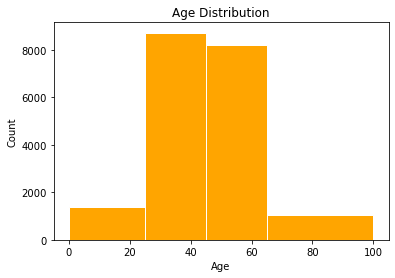

In [109]:
# age distribution
plt.hist(df['age'],color='orange',edgecolor='white',bins=[0,25,45,65,100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#most customers age are between [25,65]

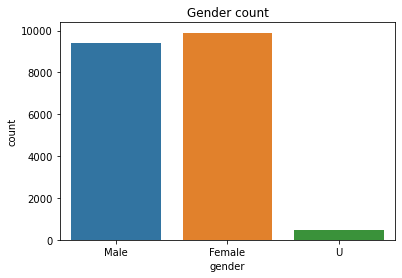

In [105]:
#check gender distribution
sn.countplot(x='gender',data=df)
plt.title('Gender count')
plt.show()

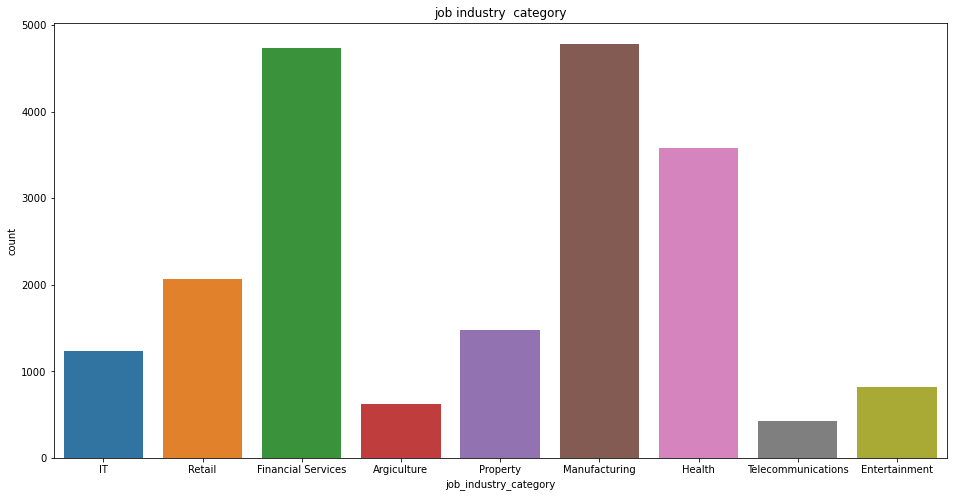

In [107]:
plt.figure(figsize=(16,8))
sn.countplot(x='job_industry_category',data=df)
plt.title('job industry  category')
plt.show()

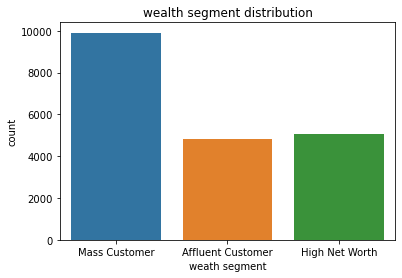

In [112]:
sn.countplot(x='wealth_segment',data=df)
plt.title('wealth segment distribution')
plt.xlabel('weath segment')
plt.ylabel('count')
plt.show()

<Figure size 1152x720 with 0 Axes>

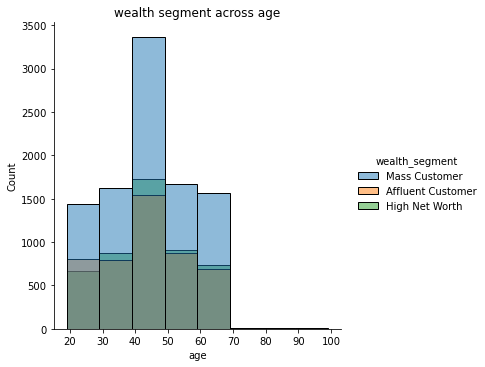

In [113]:
plt.figure(figsize=(16,10))
sn.displot(x='age',binwidth=10,data=df,hue='wealth_segment')
plt.title('wealth segment across age')
plt.show()

<Figure size 1152x720 with 0 Axes>

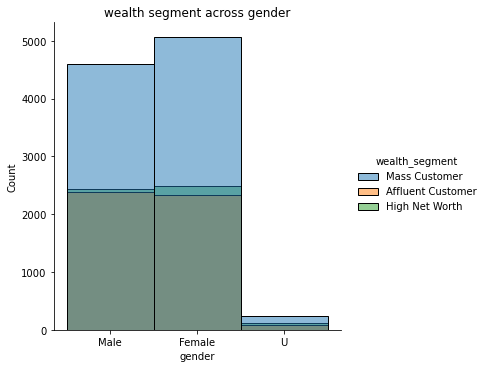

In [114]:
plt.figure(figsize=(16,10))
sn.displot(x='gender',binwidth=10,data=df,hue='wealth_segment')
plt.title('wealth segment across gender')
plt.show()

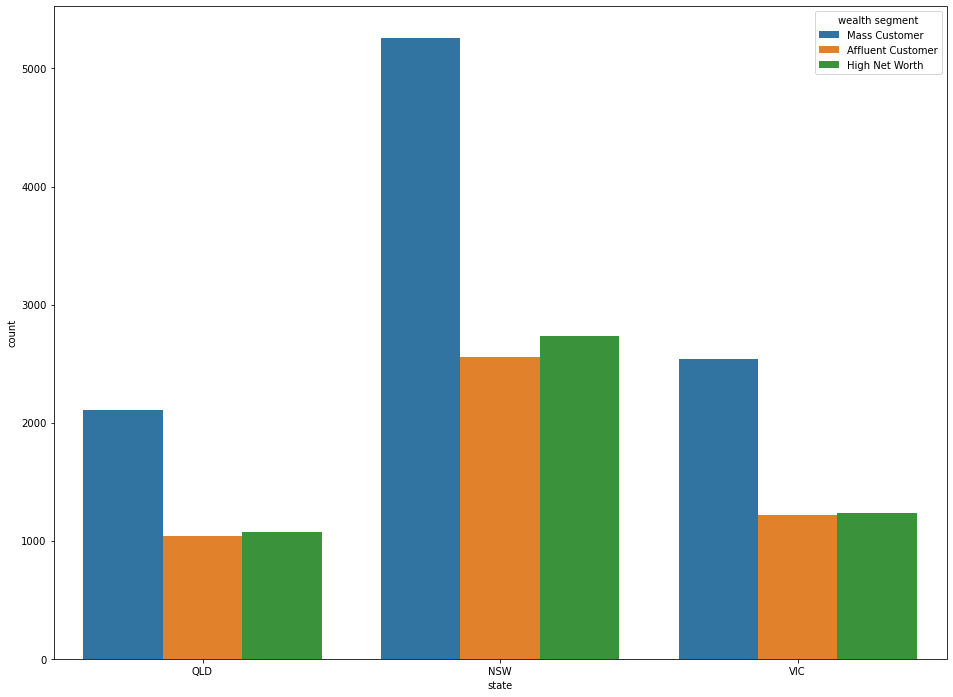

In [115]:
plt.figure(figsize=(16,12))
sn.countplot(x='state',data=df,hue='wealth_segment')
plt.legend(title='wealth segment', loc='upper right', fancybox=True)
plt.show()

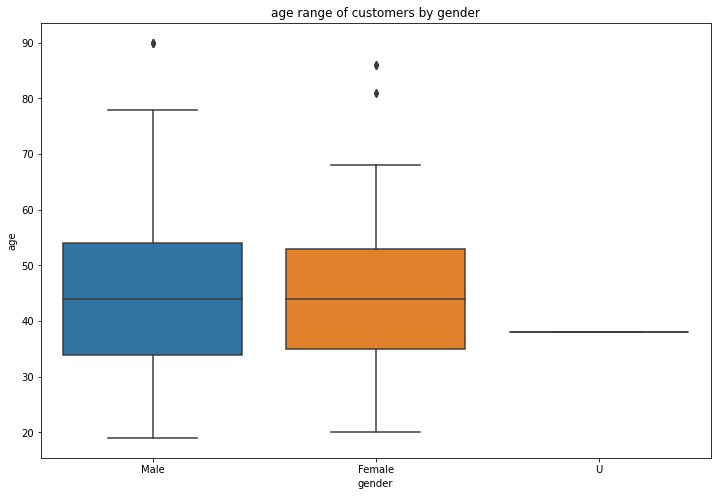

In [117]:
plt.figure(figsize=(12,8))
sn.boxplot(x=df['gender'],y=df['age'])
plt.title('age range of customers by gender')
plt.show()